

* Student name: Josiah Okumu
* Student pace:Full-time
* Scheduled project review date/time: 12/03/2023
* Instructor name: William Okomba
* Blog post URL:



# Overview
This project specifically analyzes the types of films which are currently doing best at the box office and the reasons for such performance for Microsoft to potentially get into video content production as a business venture. Using descriptive statistics and exploratory data analysis on data from various online databases with information about movies, i have been able to identify some key solution areas within which I have made recommendations. These are key areas of recommendation can be summarized as business partnerships with market giants and benchmarking from them, proper selection and hiring of the human resource and the right choice of content.

# Business Problem
Microsoft Studios is thinking of creating a new movie studio, aimed at creation of original video content, just like other giant companies who are thriving in the seemingly saturated market. However, in doing this, it is not always a walk in the park, much has to be done, or else, several roadblocks can be met in the quest to expand in this line of production. The first possible block is the fact that the market is already seeming saturated, as many are thinking of venturing into it and without strategy, it might not work. Additionally, despite the fact that Microsoft has vast experience in the production processes, movie/content is not part of them and it will have to struggle in the initial stages. This means that they lack prior experience in content production and hence possible effective and grave mistakes likely to be made along the way. Lastly, the lack of experience could roll over into the studios so that they may lack subject matter content creation, not to mention the existing knowledge on the specific domain.

# Data Understanding

The data originated from four different sources/ movies, mainly; comes from five different sources: RT_Movie_Info, TMDB_movies, Bon_movies_gross, and TN_movie_budget. These were analyzed separately and then relationship between different variables established to inform Microsoft of their next cause of action. It was joined using unique ids for movies and crew, and also using movie names.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Run the codes to explore the data used from different movies.
# RT_Movie_Info
df = pd.read_csv(r"/home/moringa/Desktop/PROJECT1/project_1/dsc-phase-1-project-v2-4/output.csv")
# TMDB_Movies
df2=pd.read_csv(r'/home/moringa/Desktop/PROJECT1/project_1/dsc-phase-1-project-v2-4/zippedData/tmdb.movies_unzipped.csv')
# Bom_movie_gross
df3= pd.read_csv(r'/home/moringa/Desktop/PROJECT1/project_1/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross_unzipped.csv')
# TN_Movie_budget
df4 = pd.read_csv('/home/moringa/Desktop/PROJECT1/project_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets_unzipped.csv')

## USING THE FIRST DATA-FRAME-RT.MOVIE_INFO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    id           1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
#To confirm the missing values from the df based on columns
df.isnull().sum()

 id                0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Looking at the columns above, there are several missing values in the first dataset, which are thus to be dealt with based on percentage of the missing values per column and the effect it might have on the outcome of this research. The columns with many missing values that cannot be replaced or filled are studio, box_office, and currency.However, synopsis is also to be dropped since it might not be used for this analysis.

In [6]:
df.duplicated().value_counts()

False    1560
dtype: int64

Dropping columns which have very many values missing from the data-frame,the column synopsis is dropped as it might not be important in this analysis.

In [7]:
#run the drop() as below to drop columns
df= df.drop(['synopsis','dvd_date','box_office','studio','currency'], axis = 1)
df

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200 minutes
...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993",101 minutes


* Making the object values of the runtime column to be integers, representing minutes, for ease of statistical data calculations, we shall run the replace string function.

In [8]:
# Run the function below to convert the runtime column
# into integers from objects for ease of use.
df['runtime'] = df['runtime'].str.replace('minutes', '')

* Forward fill

In [9]:
df['runtime']= df['runtime'].fillna(method="ffill",)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    id           1560 non-null   int64 
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   runtime       1560 non-null   object
dtypes: int64(1), object(6)
memory usage: 85.4+ KB


In [10]:
df['runtime'] = df['runtime'].astype('int')

In [11]:
df = df.dropna(axis=0)
df

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",104
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",116
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",128
5,8,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000",95
...,...,...,...,...,...,...,...
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007",98
1550,1990,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974",112
1552,1992,R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991",116
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993",88


In [12]:
df.groupby('genre')['runtime'].mean().sort_values(ascending = False)

genre
Action and Adventure|Classics|Documentary                                                  290.0
Art House and International|Comedy|Kids and Family|Musical and Performing Arts|Romance     192.0
Classics|Comedy|Drama|Kids and Family|Musical and Performing Arts                          179.0
Art House and International|Comedy|Drama|Science Fiction and Fantasy                       175.0
Action and Adventure|Art House and International|Classics|Drama                            149.0
                                                                                           ...  
Action and Adventure|Animation|Comedy|Kids and Family|Science Fiction and Fantasy           76.0
Kids and Family                                                                             75.0
Action and Adventure|Animation|Comedy|Drama|Kids and Family|Musical and Performing Arts     75.0
Documentary|Drama|Special Interest                                                          60.0
Classics|Documentary|Dra

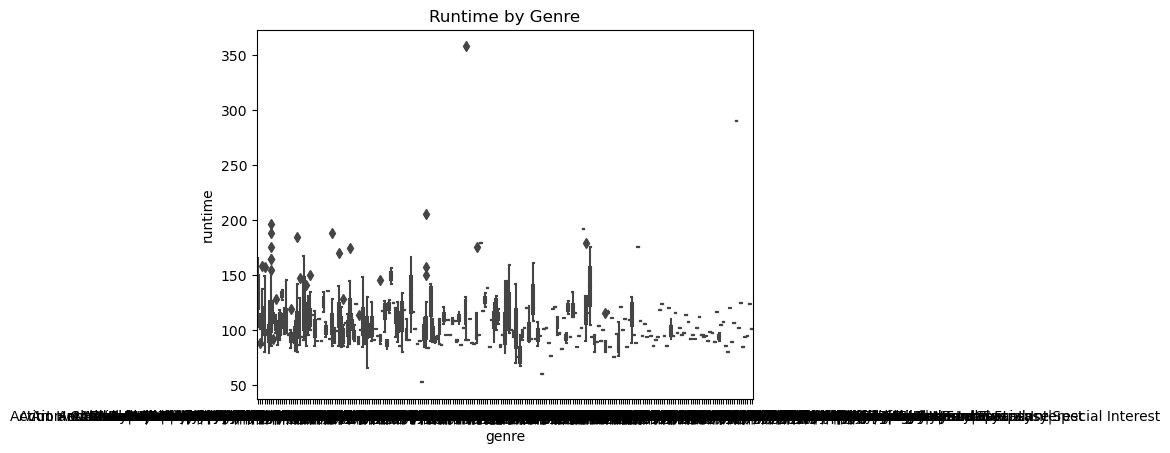

In [13]:
# create a box plot of runtime by genre
sns.boxplot(x="genre", y="runtime", data=df)

# set the plot title
plt.title("Runtime by Genre")

# show the plot
plt.show()

From the box plot above, it occurs that majority of the movies in this market are short as can be shown by the lower mean depicted by the medium lines in the graph. for such a production to be witnessed with very few movies with longer runtime, outliers, it shows that the market is saturated with short movies like comedies and action movies. Therefore, production of longer historical movies might not sell in such a market. This implies that Microsoft can look into the length of their productions as they get into the market in order to penetrate the industry and market as well.

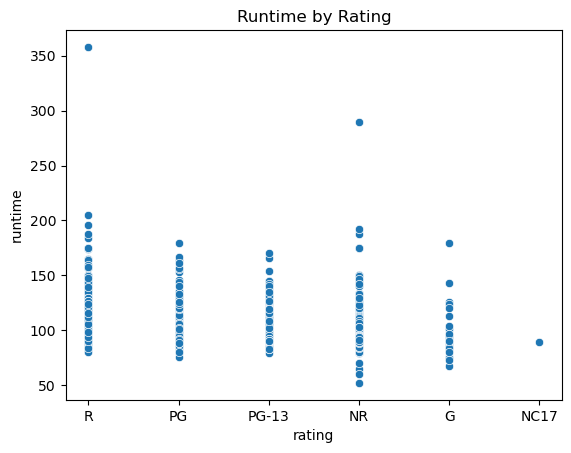

In [14]:
# create a scatter plot of runtime by rating
sns.scatterplot(x="rating", y="runtime", data=df)

# set the plot title
plt.title("Runtime by Rating")

# show the plot
plt.show()

From the above scatter plot, it is evident that the shorter the movie plot, the higher the rating and vice-versa. this means that shorter moving will tend to sell more than longer movies. this can be due to the fact that shorter movies leaves the audience in suspense and hence the urge to continue, despite the movie ending abruptly. This can be a recommendation to Microsoft to avoid long movies in their quest for production is they are to sell in such an industry.

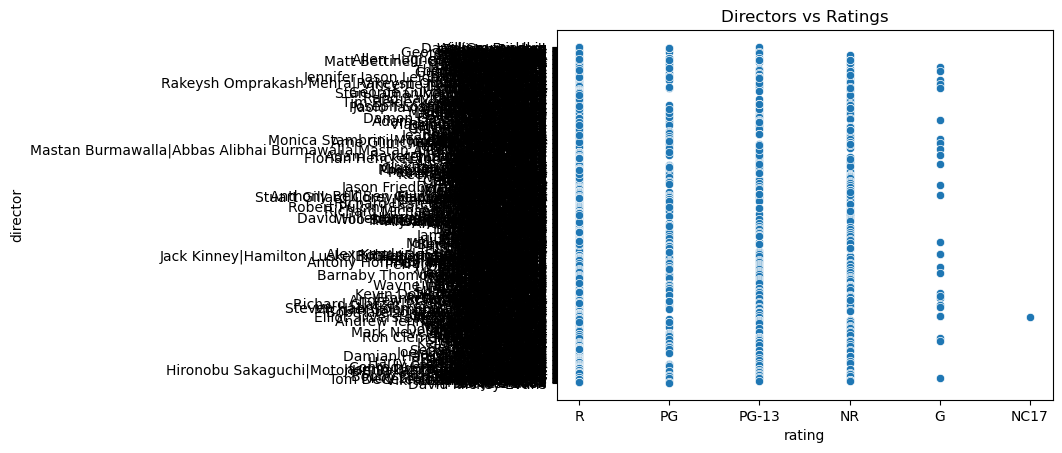

In [15]:
# create a scatter plot of director vs rating
sns.scatterplot(y="director", x="rating", data=df)

# set the plot title
plt.title("Directors vs Ratings")

# show the plot
plt.show()

# SECOND DATA-FRAME;TMDB.MOVIES

## Data-Frame 2 Cleaning

In [16]:
# Check for the missing values using the pandas function
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


* The data-frame 2 has no missing values in any of its columns, based on the above check as well as duplicates as can be seen from the test below.

In [17]:
# Check for duplicate values in the dataframe using the pandas function.
df2.duplicated().value_counts()

False    26517
dtype: int64

In [18]:
top10_len=df2.nlargest(10,'popularity')[['title','popularity']]\
.set_index('title')

In [19]:
top10_len

,popularity
title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508


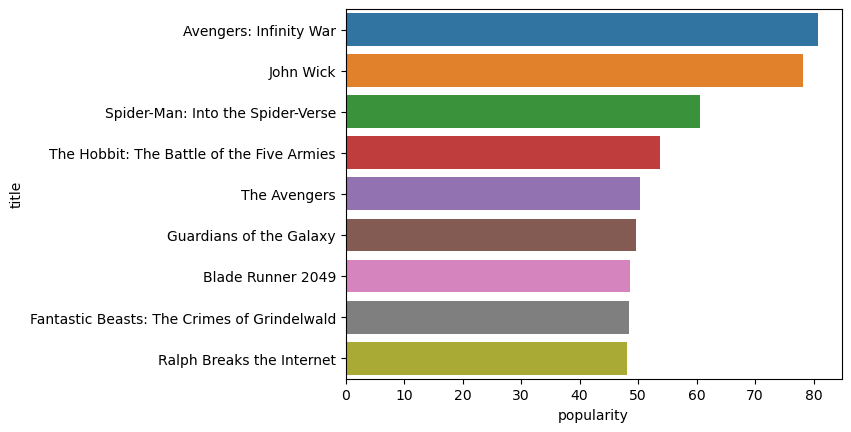

In [20]:
sns.barplot(x='popularity', y=top10_len.index, data=top10_len)
plt.show()

Looking at the above bar plot, the most common title is the avengers, while the least popular movie title is Ralph Breaks the Internet. there could be diverse reasons why these titles differ in terms of their popularity.

# DATA-FRAME 3: bom.movie_gross_unzipped.csv

In [21]:
df3.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
df3.duplicated().value_counts()

False    3387
dtype: int64

In [23]:
# Forward fill the foreign_gross column due to the low percentage of the missing values.
df3['foreign_gross']= df3['foreign_gross'].fillna(method="ffill",)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [24]:
# Forward fill the domestic_gross as the percentage of the missing values are lower than 30%
df3['domestic_gross']= df3['domestic_gross'].fillna(method="ffill",)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
# Forward fill the studio column due to the low percentage of the missing values.
df3['studio']= df3['studio'].fillna(method="ffill",)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
df3

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,30000,2018
3383,Edward II (2018 re-release),FM,4800.0,30000,2018
3384,El Pacto,Sony,2500.0,30000,2018
3385,The Swan,Synergetic,2400.0,30000,2018


## Domestic_gross by studio
Based on the functions below, it is clear that the studio that realize the highest sales domestically is BV while that which experiences the lowest returns domestically is Magn. Of importance for Microsoft is the kind of studio they can use for production, the calibre of BV, while that they should avoid is Magn. It is clear that the kind of studio affects the domestic income in the movie industry.

In [27]:
df3[df3['domestic_gross'].max()==df3['domestic_gross']]['studio']

1872    BV
Name: studio, dtype: object

In [28]:
df3[df3['domestic_gross'].min()==df3['domestic_gross']]['studio']

1476    Magn.
Name: studio, dtype: object

Looking at the top_10 studios in terms of the domestic_gross, it is clear that most of the titles uses BV studio. This could be due to the high quality content that they produce to match the customer demands which is ever changing within this volatile industry. it is clear that most directors and writers of movies prefer BV studio.

In [29]:
top10_len1=df3.nlargest(10,'domestic_gross')[['studio','domestic_gross']]\
.set_index('studio')

In [30]:
top10_len1

,domestic_gross
studio,
BV,936700000.0
BV,700100000.0
BV,678800000.0
Uni.,652300000.0
BV,623400000.0
BV,620200000.0
BV,608600000.0
BV,532200000.0
BV,504000000.0


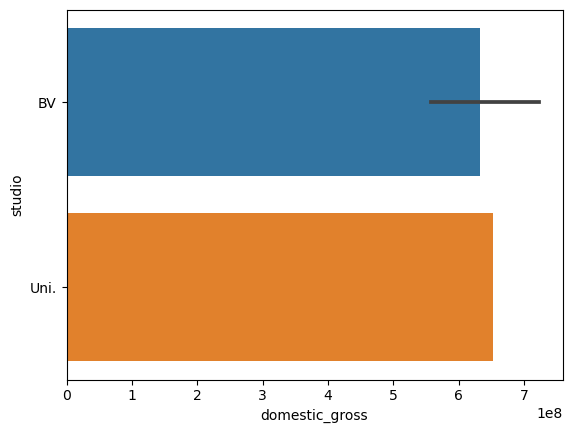

In [31]:
sns.barplot(x='domestic_gross', y=top10_len1.index, data=top10_len1)
plt.show()

Based on the above bar plot, it indicates that most of the movie authors and directors have liked BV as their studio for producing movies and hence the highest sales exhibited domestically. Therefore, apart from the title, directors and runtime, another factor that affects the sale of movies in the domestic industry that Microsoft should consider is the studio.Domestically, BV is the most preferred studio.

# DATA-FRAME 4

In [32]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [38]:
df4.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [39]:
df4.duplicated().value_counts()

False    5782
dtype: int64

In [33]:
# remove the dollar sign from all the columns
for col in df4.columns:
    if df4[col].dtype == 'object':
        df4[col] = df4[col].str.replace('$', '')

# print the updated DataFrame
print(df4)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0          425,000,000    760,507,625   2,776,345,279  
1          410,600,000    241,063,8

/tmp/ipykernel_24541/296943114.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4[col] = df4[col].str.replace('$', '')


In [34]:
# remove the comma sign from all the columns
for col in df4.columns:
    if df4[col].dtype == 'object':
        df4[col] = df4[col].str.replace(',', '')

# print the updated DataFrame
print(df4)

      id release_date                                        movie  \
0      1  Dec 18 2009                                       Avatar   
1      2  May 20 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7 2019                                 Dark Phoenix   
3      4   May 1 2015                      Avengers: Age of Ultron   
4      5  Dec 15 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78  Dec 31 2018                                       Red 11   
5778  79   Apr 2 1999                                    Following   
5779  80  Jul 13 2005                Return to the Land of Wonders   
5780  81  Sep 29 2015                         A Plague So Pleasant   
5781  82   Aug 5 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0            425000000      760507625      2776345279  
1            410600000      241063875      1045

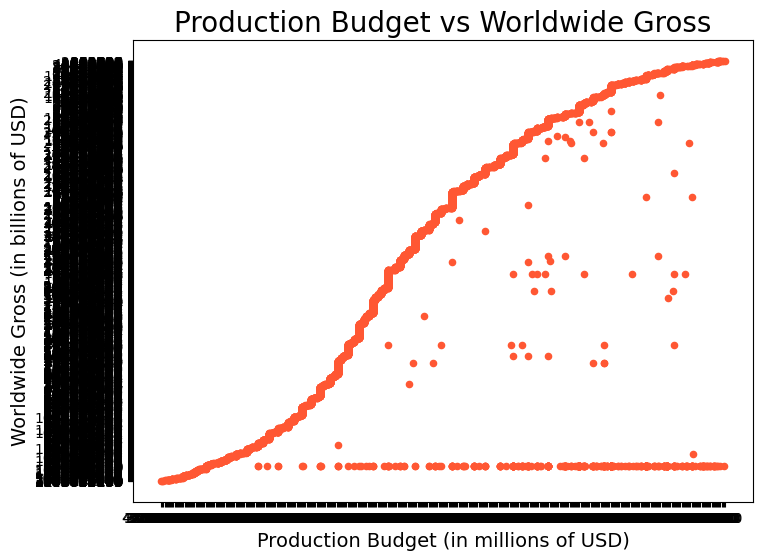

In [37]:
# create a scatter plot
ax = df4.plot(kind='scatter', x='production_budget', y='worldwide_gross', figsize=(8, 6), color='#FF5733')

# set the title and labels
ax.set_title('Production Budget vs Worldwide Gross', fontsize=20)
ax.set_xlabel('Production Budget (in millions of USD)', fontsize=14)
ax.set_ylabel('Worldwide Gross (in billions of USD)', fontsize=14)

# show the plot
plt.show()

From the above scatter plot, it is evident that production_budget and the worldwide_gross sales correlated, as the production cost of the movie increases, the effect is always pushed to the customers to shield. This could also mean that the more a movie becomes expensive to produce, the more the consumers will be buying it, thus increasing the global sales. this means that the movie industry rarely gets saturated, as long as the producers and the writers remain creative and seek to meet the consumer ever changing demands in the market.There is still market and thus Microsoft should consider venturing into the industry. 

# Conclusions

Looking at the results from the data that was presented in this case and analyzed, it is important to note that, apart from the seemingly saturated industry, Microsoft is still capable to venture into the market. However, before taking that step, it will have to adhere to some of the recommendations to help penetrate and participate into such a market. some of these recommendations would include:

Getting into partnerships and benchmarking with other studies who have been in the industry long enough are have proved themselves worth in the content creation and production, a case example is BV studio that dominated sales of titles, not only in the domestic market but also in the foreign markets.

It was also evident that most people in the movie industry like movies with short runtime and for Microsoft to penetrate into the market, it should try and produce comedies, dramas and documentaries, all of which are short runtime content, liked by the majority of the industry consumers.

Based on the analysis, the best selling movies are also writer and director specific. renown directors and writers should also be used to market the movies that will be produced by Microsoft as these factors also affects sales, either domestically or internationally. Further, as the movie production goes up, as was evident in the findings, Microsoft should be ready with resources to help in the continued production process without any production hiccups once it ventures into the industry.

Despite these recommendations, there could be other myriads of factors that influences the movie sales and the industry in general. This is due to the fact that the perceived correlation might not be caused by the factors at play but instead other hidden factors that are not identified. this means that these recommendations may not be the only ones, more can be done and established in order to make proper decisions while venturing into a particular market.